In [1]:
import sys
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
sys.path.append('../../esm') ## ignore if intsalling esm3
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
# import torch
import random

# from esm.models.esm3 import ESM3
# from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig
from esm.utils.structure.protein_chain import ProteinChain

In [2]:
fasta_builder_dict = dict()
pdbfile_loc = '/nethome/kgeorge/workspace/DomainPrediction/Data/esm_experiments/basic_gen/pdbs'

protein = ProteinChain.from_pdb('../../Data/GxpS_ATC.pdb')

fasta_builder_dict['GxpS_ATC'] = protein.sequence

A = [i for i in range(33,522)] ## 34-522
C = [i for i in range(637,1067)] ## 638-1067
T = [i for i in range(538,608)] ## 539-608
cond = A + C

sequence_prompt = ''.join([protein[i].sequence for i in range(len(protein))])

In [3]:
''.join([sequence_prompt[i] for i in range(len(sequence_prompt)) if i in T])

'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP'

In [4]:
# N_GENERATIONS = 1
# current_prompt = sequence_prompt
# print('n masks: ', current_prompt.count('_'))
# for idx in range(N_GENERATIONS):
#     gen_idx = f'GxpS_ATC-temp_{0.5}-gen_{idx}'
#     print(gen_idx)

#     sequence_prediction_config = GenerationConfig(
#         track="sequence", 
#         num_steps=1, 
#         temperature=0.5
#     )
#     esm_protein = ESMProtein(sequence=sequence_prompt)
#     generated_protein = model.generate(esm_protein, sequence_prediction_config)

#     generated_T = ''.join([generated_protein.sequence[i] for i in range(len(generated_protein.sequence)) if i in T])
#     print(f"T domain: {generated_T}")

#     assert len(generated_protein.sequence) == len(current_prompt)
#     assert protein[A].sequence == ''.join([generated_protein.sequence[i] for i in range(len(generated_protein.sequence)) if i in A])
#     assert protein[C].sequence == ''.join([generated_protein.sequence[i] for i in range(len(generated_protein.sequence)) if i in C])

#     current_prompt = generated_protein.sequence

In [5]:
# for i in range(10):
#     current_prompt = sequence_prompt
#     sample_pos = random.sample(T, 1)[0]
#     print(sample_pos, len(T))
#     print(''.join([current_prompt[i] for i in range(len(current_prompt)) if i in T]))
#     current_prompt = current_prompt[:sample_pos] + '_' + current_prompt[sample_pos+1:]
#     print(''.join([current_prompt[i] for i in range(len(current_prompt)) if i in T]))
    

Check

In [6]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [7]:
with open('replacement_logs.txt') as f:
    content = f.readlines()

In [8]:
len(content)

56066

In [9]:
A = [i for i in range(33,522)] ## 34-522
C = [i for i in range(637,1067)] ## 638-1067
T = [i for i in range(538,608)] ## 539-608

In [11]:
counts = []
collection = set()
collectionA = set()
collectionC = set()
Tdomains = []
for protein in tqdm(content):
    genA = ''.join([protein[i] for i in range(len(protein.strip())) if i in A])
    genT = ''.join([protein[i] for i in range(len(protein.strip())) if i in T])
    genC = ''.join([protein[i] for i in range(len(protein.strip())) if i in C])
    
    collection.add(genT)
    Tdomains.append(genT)
    counts.append(len(collection))

    collectionA.add(genA)
    collectionC.add(genC)
    

100%|██████████| 56066/56066 [03:36<00:00, 258.71it/s]


In [12]:
collectionA

{'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLP'}

In [13]:
collectionC

{'QAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFNALLNYRHNTQPVTPDEIVSGIEFLGAQERTNYPFVLSVEDSGSDLGLTAQVVQPFDPERICGYMQQALASLVQA'}

Text(0.5, 0, 'rounds')

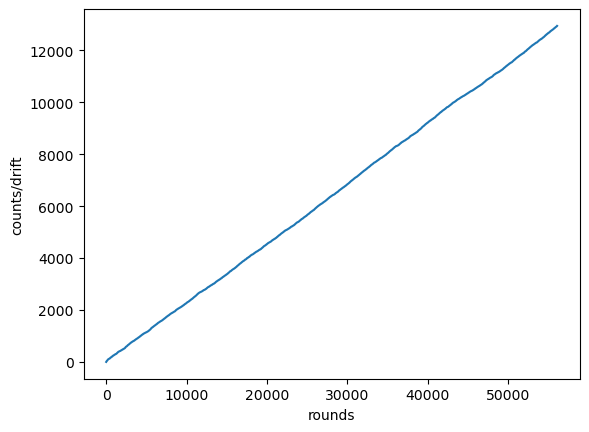

In [14]:
plt.plot(counts)
plt.ylabel('counts/drift')
plt.xlabel('rounds')

In [15]:
genT

'NATERILAAIWQQVLGVEQVGIHDNFFELGGHSILSIQVVSRARAAGLTFTPRQLFEHQTIAELAEHVEP'

In [16]:
''.join([sequence_prompt[i] for i in range(len(sequence_prompt)) if i in T])

'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP'

In [17]:
''.join([str(i) for i in [0,1,2,3,4,5,6,7,8,9]*7])

'0123456789012345678901234567890123456789012345678901234567890123456789'

In [18]:
seq_length = len(Tdomains[0])
assert all(len(seq) == seq_length for seq in Tdomains)

In [20]:
Tdomains

['GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSVLAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSELAQSLVP',
 'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSELAQQLVP',
 'GEIEIALATIWRELLNVEQVGRHDNFFALGGHSLLAVRMIERLRRIGLELDVQTLFQAQTLSELAQQLVP',
 'GEIEIALATIWRELLNVEQVGRH

In [21]:
from collections import Counter, defaultdict
from math import log2

In [22]:
entropies = []
for i in range(seq_length):
    column = [seq[i] for seq in Tdomains]

    counts = Counter(column)
    total = sum(counts.values())
    frequencies = [count / total for count in counts.values()]
    entropy = -sum(f * log2(f) for f in frequencies)
    entropies.append(entropy)

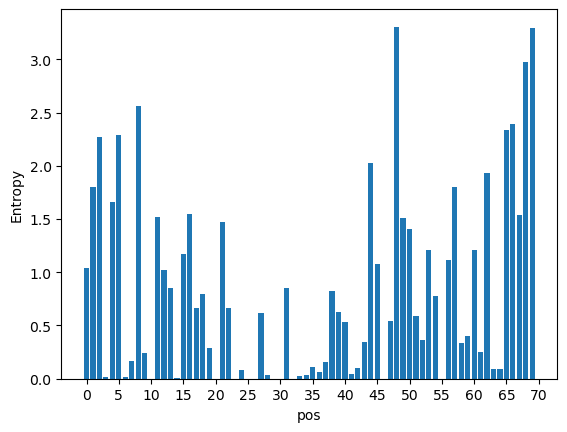

In [23]:
plt.bar(np.arange(seq_length),entropies)
plt.ylabel('Entropy')
plt.xlabel('pos')
plt.xticks(np.arange(0, 71, 5))
plt.show()

In [24]:
log2(20) ## uniformly samplednmax entropy

4.321928094887363

In [25]:
sum(entropies)

59.058778149405754

In [26]:
count_dict_T = Counter(Tdomains)

In [27]:
count_dict_T.most_common(10)

[('TPVEEVLAGIWAEVLGLERVGIHDNFFELGGHSILSIQVVSRARKAGLQFTPRQLFEQQTIAALAQSVTV',
  38),
 ('TPVEETLAGIWAEVLGLERVGIHDNFFELGGHSILSIQVVSRARQRGLRFTPRQLFEHQTIAQLAQVVEQ',
  37),
 ('TPTEEILAGIWAEVLGLERVGIHDNFFELGGHSILSIQVVSRARQAGLSFTPQQLFEHQTIAALAEVATP',
  37),
 ('TSTEQLLARIWAEVLGLERVGIHDNFFELGGHSILSIQVVSRARQAGLQLTPRQLFEHQTIAELAAVASV',
  35),
 ('TPAEELLAGIWAEVLGLERVGIHDNFFELGGDSILSIQVVSRARASGLSLTPRQLFEHQTIAELAAVAGE',
  35),
 ('NPVEETLASIWAEVLGVERVGIHDNFFDLGGHSILSIQVVSRARQAGLVFTPKQLFEGQTIAQLAATVET',
  33),
 ('GEIETTLAGIWAEVLGLERVGRHDNFFELGGHSILSIQVVSRARKAGIFFTPRQLFEHQTIAELALVATP',
  33),
 ('TPVEETLAGIWAELLGLERVGIHDNFFELGGHSILSIQVVSRARQAGLLLTPRQLFEYQTIAELAAVVEA',
  33),
 ('TPVEQTLADIWAEVLNIERVGIHDNFFELGGHSILSIQVISRARAAGLALTARQLFEHQTIAALAAVAEP',
  31),
 ('TPVEEILATIWAEVLGLERVGIHDNFFELGGHSILSIQVVARAREAGLAFTPRQLFQHQTIAELATVVEP',
  31)]

In [28]:
aa_freq = {
    'A' : [],
    'R' : [],
    'N' : [],
    'D' : [],
    'C' : [],
    'Q' : [],
    'E' : [],
    'G' : [],
    'H' : [],
    'I' : [],
    'L' : [],
    'K' : [],
    'M' : [],
    'F' : [],
    'P' : [],
    'S' : [],
    'T' : [],
    'W' : [],
    'Y' : [],
    'V' : [],
}
for i in range(seq_length):
    column = [seq[i] for seq in Tdomains]

    counts = Counter(column)
    total = sum(counts.values())
    frequencies = {aa : count / total for aa, count in counts.items()}
    
    for aa in aa_freq:
        if aa in frequencies:
            aa_freq[aa].append(frequencies[aa])
        else:
            aa_freq[aa].append(0)

In [29]:
df_aa_freq = pd.DataFrame(aa_freq).T

In [30]:
df_aa_freq

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
A,0.000000,0.169122,0.209664,0.000000,0.022973,0.084115,0.000000,0.980844,0.429601,0.000000,...,0.000000,0.973460,0.335747,0.000000,0.989887,0.517105,0.073449,0.408358,0.080869,0.138997
R,0.000000,0.000000,0.005422,0.000000,0.036528,0.021546,0.000000,0.000000,0.079264,0.000000,...,0.000000,0.003781,0.006956,0.000000,0.000000,0.036350,0.050494,0.000000,0.027842,0.018585
N,0.081725,0.000250,0.000214,0.000000,0.000000,0.000000,0.000000,0.000000,0.004477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005279,0.003853
D,0.001516,0.037777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055756,0.000000,...,0.000000,0.000000,0.075233,0.000000,0.000000,0.000838,0.000000,0.000000,0.073217,0.056505
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003639,0.000000,0.000000,...,0.000000,0.001784,0.000000,0.000000,0.000000,0.000000,0.004459,0.002622,0.000000,0.000000
Q,0.000000,0.007045,0.006118,0.001908,0.492776,0.121517,0.000000,0.000000,0.053651,0.000000,...,0.000000,0.001302,0.093033,0.000000,0.000000,0.186441,0.039578,0.000000,0.231013,0.067563
E,0.000375,0.161542,0.008526,0.998092,0.394606,0.002515,0.000000,0.000000,0.070364,0.000000,...,0.000000,0.007366,0.451521,0.000000,0.000000,0.052902,0.000517,0.000000,0.249759,0.099436
G,0.082920,0.000892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199586,0.000000,...,0.000000,0.001195,0.021600,0.000000,0.001712,0.022688,0.000000,0.000000,0.026237,0.037153
H,0.000000,0.000000,0.000000,0.000000,0.000446,0.000071,0.000000,0.000000,0.008508,0.000000,...,0.000000,0.001427,0.000000,0.000000,0.000000,0.000428,0.029019,0.000000,0.008668,0.007598
I,0.000000,0.000000,0.076392,0.000000,0.004637,0.069525,0.001052,0.000000,0.000000,0.967271,...,0.686994,0.000000,0.000000,0.000499,0.000000,0.000000,0.083509,0.039561,0.000428,0.008954


In [34]:
set_T = set(Tdomains)
for seq in set_T:
    p = 1
    for i, aa in enumerate(seq):
        p *= df_aa_freq.loc[aa, i]
    print(seq, p)

GEVEQTLAGIWAELLGVEQVGRHDNFFELGGDSILSIQLVSRARRAGLGFTPKQLFEHPVLADLAAAAVV 3.688396823952189e-24
TPVEETLAAIWAELLGLERVGIHDNFFELGGDSILSIRVVARARQAGLRLTPRQLFEHQTIAELAAVVEA 1.4525432080049305e-13
NAVEETLAGIWTEVLGLERVGIHDNFFELGGHSILSIQIVSRARKAGLTITPRQLFERQTLADLAAIAEG 1.8180860362231033e-20
NATEETLAQIWAEVLGIDRVGIHDNFFELGGHSILSIQVVSRARTAGLDLSVRTLFESQTVAALAAQAQP 8.616849511268784e-23
TPVEQTLAAIWADVLQLPQVGIHDNFFELGGHSILSIQIVSRARQVGLAFTPKQLFQHQTIAALAAVVED 2.1625871032265512e-19
TPIEQTLAAIWAEVLGVDQIGIHDNFFALGGDSILSIQVVSRARQAGLSFTPRDLFEHQTVAALAQVAQL 6.529619671843152e-18
TAEEQILAAIWSDVLNLERVGIHDNFFELGGDSILSIQVVSRARAAGLTFTPRQLFEHQTIAALSRVAQP 7.302320206969802e-20
TPAEQALATIWAEVLGIDQVGAHDNFFELGGHSILSIQVVSRAAQQGLSFTPRQLFETQTVAALAAVAEP 2.8655805788980357e-21
TEVEQQLAQIWAAVLGLERVGIHDNFFELGGDSILSIQVVSRAREAGLALTPRQLFENQTIAELAAAVEP 3.0340988890370546e-16
TPAEQTLANIWAEVLSLERVGITDNFFELGGHSILSIQVIARARQAGLSFSARDLFETQTIAQLATIVNE 6.561905622634623e-25
NATEETLARIWAEVLGIERVGIHDNFFELGGHSILSIQVVSRARQAGLVLTPRDIFRHQTLAELA

In [43]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [44]:
esm_fasta = SeqIO.parse('/nethome/kgeorge/workspace/DomainPrediction/Data/esm_experiments/gen_1000/esm_inp_seq_1000.fasta', 'fasta')

In [45]:
combined_records = []
for rec in esm_fasta:
    seq_rec = SeqRecord(Seq(''.join([str(rec.seq)[i] for i in T])), id=rec.id, name=rec.name, description=rec.description)
    combined_records.append(seq_rec)

TATEQALSEIWAELLGLERVGIHDNFFELGGHSILAIQAMSRIRQSLGVEVPLRALFETPTIAELAERLQ 0.0
TPTEQALAGIWAEVLGLERVGIHDNFFELGGHSILAIQVLSRIKAALGVELPVRALFEQPTLAELAQRID 0.0
PVEQLLAEIWGEVLGLDRIGLHDNFFDLGGHSILAIQVISRIRTALGVELPLRALFEAPTLADLASRIDA 0.0
NATEERLAGIWADVLGLERVGIHDNFFDLGGHSLLAIRVVSRIRSVLGVELPLRSLFESPTIAELAAQID 0.0
TQTEEVLAAIWAEMLGLERVGVHDNFFELGGHSILSIQLIARIRAVLGVELPLRALFQAPTIAELAGLIA 0.0
TPAEEILAGIWQDVLGLSRIGRHDNFFELGGHSILAIQVIARIRSALGVELPLRTLFEAPTLAELAERID 0.0
TETEEALAAIWQEVLGVERIGIHDNFFELGGHSILAIQVISRIRTRLGVELPLRALFEAPTIAQLAPRLE 0.0
TPTEEVLAEIWREVLGLERIGVHDNFFELGGDSILAIQVISRIRGVLQVELPLRSLFEAPTIAQLAARID 0.0
TPTEEVLAAIWAELLGIERVGVHDNFFELGGHSILAVQLISRIRATFGVELALRALFEAPTVAELAARID 0.0
TATEQQLADIWAELLGLERVGVHDNFFELGGHSILAIRLAARIRSVFGVELPLRALFEAPTIAELAAHIE 0.0
GAVETTLAELWAELLGVERIGRHDNFFELGGDSILAIRIVAQVRQRFGVEIPVRALFTQPTLAELASAIE 0.0
DELEQALASIWAEVLGVERVGVHDNFFELGGHSILAIQVIARIRTELGIELPLRALFEAPTIEALAARLP 0.0
SPTEETLADIWCELLKLERVGIHDNFFEIGGHSILSIQLISRIRASFGLELPLKTLFEQPTIAQLAPVIE 0.0
TPAEELIAAIWSELLGLDQIGVHDN

In [23]:
thresh = 0.01
df_filtered = df_aa_freq.map(lambda x: x if x >= thresh else 0)

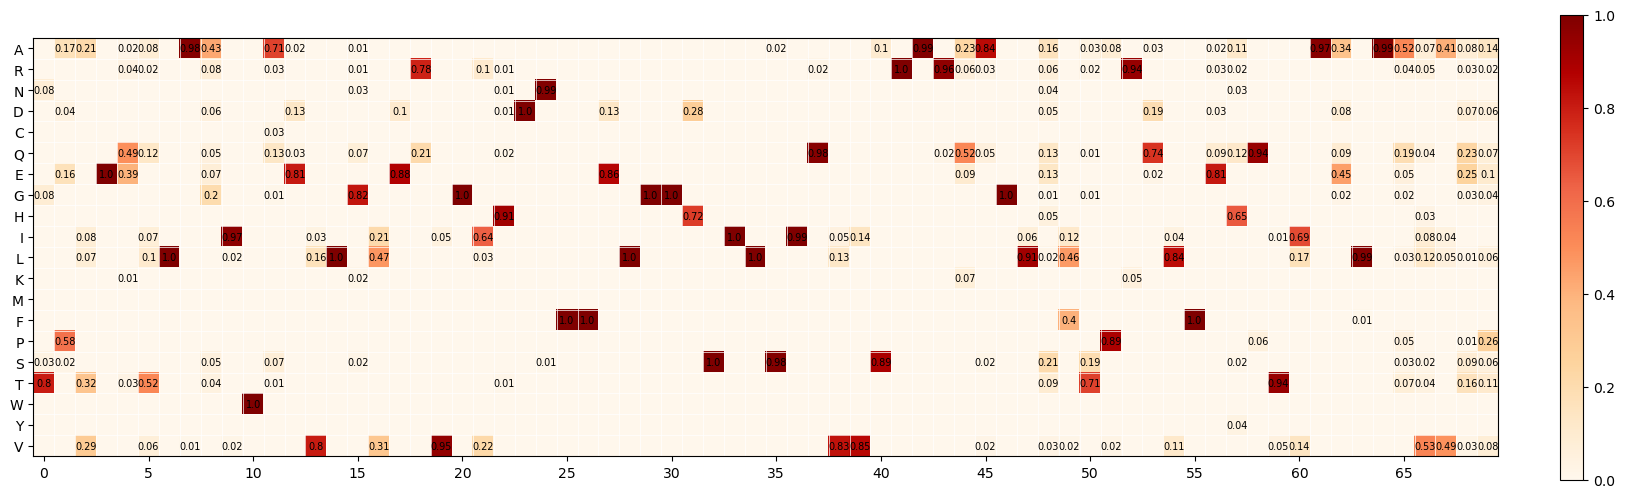

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(df_filtered, cmap="OrRd")
ax.set_xticks(np.arange(0, 71, 5))
ax.set_yticks(np.arange(len(df_filtered.index)), labels=df_filtered.index)
ax.figure.colorbar(im, ax=ax, fraction=0.015, pad=0.04)
plt.hlines(y=np.arange(0, 20)+0.5, xmin=np.full(20, 0)-0.5, xmax=np.full(20, 70)-0.5, color="w", linewidth=0.5)
plt.vlines(x=np.arange(0, 70)+0.5, ymin=np.full(70, 0)-0.5, ymax=np.full(70, 20)-0.5, color="w", linewidth=0.5)

for i in range(df_filtered.shape[0]):
    for j in range(df_filtered.shape[1]):
        if df_filtered.iloc[i, j] > 0:
            text = ax.text(j, i, round(df_filtered.iloc[i, j],2),
                        ha="center", va="center", color="k", size=7)
plt.show()

In [25]:
def mi(a, b, ab):
    return ab*log2(ab/(a*b))

def get_frequencies(column):
    counts = Counter(column)
    total = sum(counts.values())
    frequencies = {aa : count / total for aa, count in counts.items()}

    return frequencies

In [26]:
MI_matrix = np.zeros((seq_length, seq_length))
for i in tqdm(range(seq_length)):
    for j in range(i+1, seq_length):
        column_i = [seq[i] for seq in Tdomains]
        column_j = [seq[j] for seq in Tdomains]
        column_ij = [seq[i]+seq[j] for seq in Tdomains]

        frequencies_i = get_frequencies(column_i)
        frequencies_j = get_frequencies(column_j)
        frequencies_ij = get_frequencies(column_ij)

        MI = 0
        for ab in frequencies_ij:
            MI += mi(frequencies_i[ab[0]], frequencies_j[ab[1]], frequencies_ij[ab])

        MI_matrix[i, j] = MI
    


100%|██████████| 70/70 [00:32<00:00,  2.15it/s]


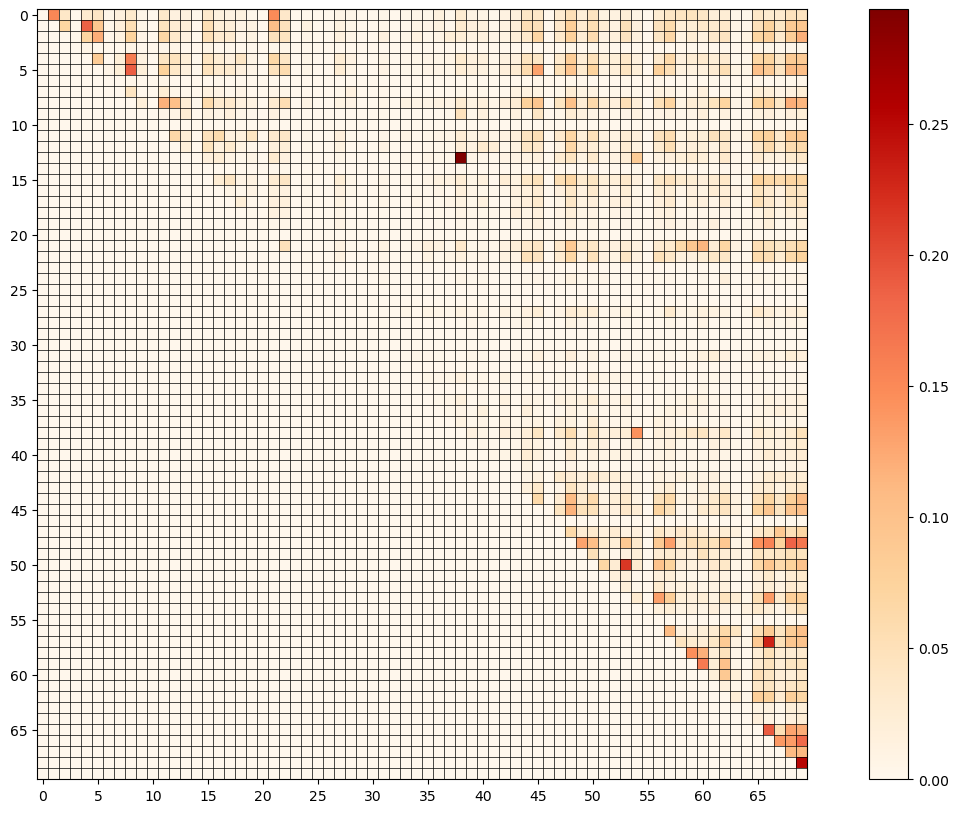

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(MI_matrix, cmap="OrRd")
ax.set_xticks(np.arange(0, 71, 5))
ax.set_yticks(np.arange(0, 71, 5))
plt.hlines(y=np.arange(0, 70)+0.5, xmin=np.full(70, 0)-0.5, xmax=np.full(70, 70)-0.5, color="k", linewidth=0.5)
plt.vlines(x=np.arange(0, 70)+0.5, ymin=np.full(70, 0)-0.5, ymax=np.full(70, 70)-0.5, color="k", linewidth=0.5)
ax.figure.colorbar(im, ax=ax, fraction=0.045, pad=0.04)
plt.show()

In [40]:
# Number of top values to find
top_n = 10
flattened_matrix = MI_matrix.flatten()
top_indices_flat = np.argpartition(flattened_matrix, -top_n)[-top_n:]
top_indices_flat = top_indices_flat[np.argsort(flattened_matrix[top_indices_flat], )][::-1]

In [41]:
# top 10 MI position
np.unravel_index(top_indices_flat, MI_matrix.shape)

(array([13, 68, 57, 50, 65,  5,  1, 48, 66, 48]),
 array([38, 69, 66, 53, 66,  8,  4, 68, 69, 69]))

In [44]:
MI_data = []
for i in tqdm(range(seq_length)):
    for j in range(i+1, seq_length):
        column_i = [seq[i] for seq in Tdomains]
        column_j = [seq[j] for seq in Tdomains]
        column_ij = [seq[i]+seq[j] for seq in Tdomains]

        frequencies_i = get_frequencies(column_i)
        frequencies_j = get_frequencies(column_j)
        frequencies_ij = get_frequencies(column_ij)

        for ab in frequencies_ij:
            dp = (i, j, ab[0], ab[1], ab, frequencies_i[ab[0]], frequencies_j[ab[1]], frequencies_ij[ab], mi(frequencies_i[ab[0]], frequencies_j[ab[1]], frequencies_ij[ab]))
            MI_data.append(dp)

100%|██████████| 70/70 [00:32<00:00,  2.13it/s]


In [49]:
MI_data_sorted = sorted(MI_data, key=lambda k: k[8], reverse=True)

In [56]:
for dp in MI_data_sorted[:20]:
    print(dp)

(13, 38, 'L', 'L', 'LL', 0.1636820889665751, 0.1262619056112439, 0.10987050975635858, 0.2648336794608747)
(38, 54, 'L', 'V', 'LV', 0.1262619056112439, 0.1140976706025042, 0.06938251346627189, 0.15735144613765467)
(0, 21, 'G', 'R', 'GR', 0.08292012984696608, 0.10450183712053651, 0.05486391039132451, 0.14607707438554363)
(21, 60, 'R', 'L', 'RL', 0.10450183712053651, 0.16881889202011915, 0.06665358684407663, 0.12782010697193405)
(13, 38, 'V', 'V', 'VV', 0.8021439018299861, 0.8268826026468805, 0.7428923054970927, 0.12149081569309443)
(58, 60, 'P', 'L', 'PL', 0.056754539292976136, 0.16881889202011915, 0.050422716084614565, 0.12080222795587954)
(0, 1, 'T', 'P', 'TP', 0.7994328113295045, 0.5840438055149288, 0.5421645917311739, 0.11689373423111311)
(58, 59, 'P', 'V', 'PV', 0.056754539292976136, 0.046445260942460674, 0.03231905254521457, 0.11686485083940523)
(59, 60, 'V', 'L', 'VL', 0.046445260942460674, 0.16881889202011915, 0.045767488317340274, 0.1164894001382181)
(13, 54, 'L', 'V', 'LV', 0.1

In [55]:
temp = []
for dp in MI_data_sorted[:10]:
    temp.append((dp[0], dp[1]))
temp

[(13, 38),
 (38, 54),
 (0, 21),
 (21, 60),
 (13, 38),
 (58, 60),
 (0, 1),
 (58, 59),
 (59, 60),
 (13, 54)]

In [52]:
for dp in MI_data_sorted[-10:]:
    print(dp)

(57, 62, 'H', 'A', 'HA', 0.6500374558555988, 0.33574715513858666, 0.18155388292369706, -0.048215654135113216)
(38, 54, 'V', 'V', 'VV', 0.8268826026468805, 0.1140976706025042, 0.04102307994149752, -0.04928988869528108)
(58, 60, 'Q', 'L', 'QL', 0.9409267648842435, 0.16881889202011915, 0.11607748011272429, -0.05253000443441972)
(13, 54, 'L', 'L', 'LL', 0.1636820889665751, 0.841561730817251, 0.09051831769699996, -0.0548319951756169)
(38, 54, 'L', 'L', 'LL', 0.1262619056112439, 0.841561730817251, 0.04801483965326579, -0.05502539860043784)
(4, 18, 'Q', 'R', 'QR', 0.4927763707059537, 0.7839510576820177, 0.3447543966040024, -0.05660854178300969)
(59, 60, 'T', 'L', 'TL', 0.9386080690614633, 0.16881889202011915, 0.10849712838440409, -0.05928437918879336)
(50, 53, 'T', 'D', 'TD', 0.7082545571290978, 0.19139942210965646, 0.0808333036064638, -0.06029393641964397)
(53, 56, 'D', 'E', 'DE', 0.19139942210965646, 0.8123461634502194, 0.10080975992580174, -0.0630179642228882)
(13, 38, 'L', 'V', 'LV', 0.16